<a href="https://colab.research.google.com/github/gokulgobinathan/MACHINE-LEARNING/blob/main/SPAM_DETECTION_USING_TENSORFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(data['Message'], data['Category'], test_size=0.2)

In [ ]:
X_test

1593    Will it help if we propose going back again to...
243     Okay. No no, just shining on. That was meant t...
2532    What's happening with you. Have you gotten a j...
2707    S now only i took tablets . Reaction morning o...
5125    After my work ah... Den 6 plus lor... U workin...
                              ...                        
2502                         No da..today also i forgot..
1114    No I'm good for the movie, is it ok if I leave...
5038                         (You didn't hear it from me)
4006    , ow u dey.i paid 60,400thousad.i told  u woul...
4922    Its so common hearin How r u? Wat r u doing? H...
Name: Message, Length: 1115, dtype: object

In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 100
max_len = 10
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)

In [ ]:
vectorize_layer.adapt(X_train)

In [ ]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'to',
 'i',
 'you',
 'a',
 'the',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'for',
 'your',
 'of',
 'it',
 'call',
 'have',
 'on',
 'that',
 'are',
 'now',
 '2',
 'im',
 'so',
 'or',
 'but',
 'not',
 'ur',
 'at',
 'get',
 'can',
 'be',
 'do',
 'with',
 'will',
 'if',
 'just',
 'we',
 'no',
 'up',
 'this',
 'its',
 'dont',
 'when',
 'from',
 'go',
 'all',
 'how',
 'free',
 '4',
 'what',
 'out',
 'ok',
 'ltgt',
 'know',
 'good',
 'like',
 'come',
 'ill',
 'am',
 'got',
 'then',
 'was',
 'only',
 'day',
 'time',
 'there',
 'want',
 'text',
 'love',
 'send',
 'as',
 'by',
 'one',
 'going',
 'need',
 'he',
 'see',
 'about',
 'txt',
 'r',
 'lor',
 'home',
 'stop',
 'sorry',
 'still',
 'our',
 'today',
 'hi',
 'n',
 'mobile',
 'back',
 'new',
 'please',
 'reply',
 'been',
 'tell',
 'think']

In [ ]:
vectorize_layer.get_weights()

[array([b'to', b'i', b'you', b'a', b'the', b'u', b'and', b'is', b'in',
        b'me', b'my', b'for', b'your', b'of', b'it', b'call', b'have',
        b'on', b'that', b'are', b'now', b'2', b'im', b'so', b'or', b'but',
        b'not', b'ur', b'at', b'get', b'can', b'be', b'do', b'with',
        b'will', b'if', b'just', b'we', b'no', b'up', b'this', b'its',
        b'dont', b'when', b'from', b'go', b'all', b'how', b'free', b'4',
        b'what', b'out', b'ok', b'ltgt', b'know', b'good', b'like',
        b'come', b'ill', b'am', b'got', b'then', b'was', b'only', b'day',
        b'time', b'there', b'want', b'text', b'love', b'send', b'as',
        b'by', b'one', b'going', b'need', b'he', b'see', b'about', b'txt',
        b'r', b'lor', b'home', b'stop', b'sorry', b'still', b'our',
        b'today', b'hi', b'n', b'mobile', b'back', b'new', b'please',
        b'reply', b'been', b'tell', b'think'], dtype=object)]

In [ ]:
model.add(vectorize_layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 10)                0         
 ctorization)                                                    
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Embedding
model.add(Embedding(max_tokens + 1, 8))

In [ ]:
from tensorflow.keras.layers import LSTM, SimpleRNN
model.add(LSTM(16))


In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 10)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 10, 8)             808       
                                                                 
 lstm (LSTM)                 (None, 16)                1600      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2697 (10.54 KB)
Trainable params: 2697 (10.54 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
140/140 [==============================] - 9s 28ms/step - loss: 0.4868 - accuracy: 0.8539
Epoch 2/100
140/140 [==============================] - 2s 11ms/step - loss: 0.2294 - accuracy: 0.9042
Epoch 3/100
140/140 [==============================] - 1s 7ms/step - loss: 0.1780 - accuracy: 0.9372
Epoch 4/100
140/140 [==============================] - 1s 6ms/step - loss: 0.1721 - accuracy: 0.9370
Epoch 5/100
140/140 [==============================] - 1s 6ms/step - loss: 0.1657 - accuracy: 0.9405
Epoch 6/100
140/140 [==============================] - 1s 8ms/step - loss: 0.1615 - accuracy: 0.9455
Epoch 7/100
140/140 [==============================] - 2s 15ms/step - loss: 0.1605 - accuracy: 0.9437
Epoch 8/100
140/140 [==============================] - 2s 13ms/step - loss: 0.1587 - accuracy: 0.9446
Epoch 9/100
140/140 [==============================] - 1s 10ms/step - loss: 0.1568 - accuracy: 0.9441
Epoch 10/100
140/140 [==============================] - 1s 7ms/step - loss: 0.1557 - a

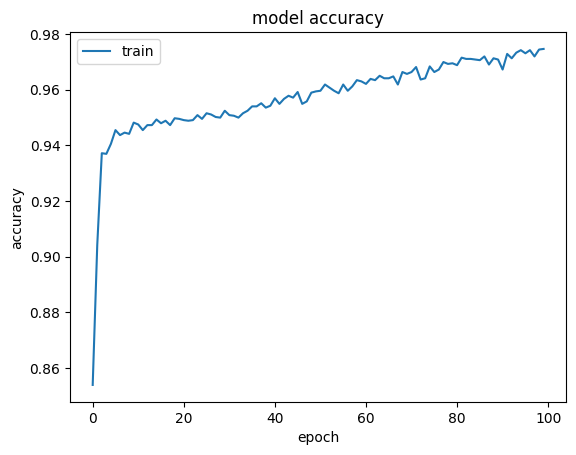

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

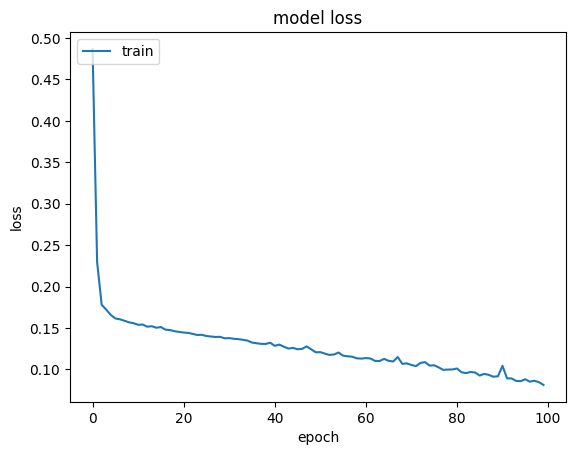

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(model.predict([
  "Free entry in 2 a wkly comp to win FA Cup fina...",
]))

1/1 [==============================] - 0s 465ms/step
[[0.817792]]


In [ ]:
print(model.predict([
  "Where are you Dear",
]))

1/1 [==============================] - 0s 49ms/step
[[0.01205911]]


In [ ]:
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape)

(101, 8)


In [ ]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
words = np.loadtxt('meta.tsv', skiprows=1, dtype=str)
words

array(['to', 'i', 'you', 'a', 'the', 'u', 'and', 'is', 'in', 'me', 'my',
       'for', 'your', 'of', 'it', 'call', 'have', 'on', 'that', 'are',
       'now', '2', 'im', 'so', 'or', 'but', 'not', 'ur', 'at', 'get',
       'can', 'be', 'do', 'with', 'will', 'if', 'just', 'we', 'no', 'up',
       'this', 'its', 'dont', 'when', 'from', 'go', 'all', 'how', 'free',
       '4', 'what', 'out', 'ok', 'ltgt', 'know', 'good', 'like', 'come',
       'ill', 'am', 'got', 'then', 'was', 'only', 'day', 'time', 'there',
       'want', 'text', 'love', 'send', 'as', 'by', 'one', 'going', 'need',
       'he', 'see', 'about', 'txt', 'r', 'lor', 'home', 'stop', 'sorry',
       'still', 'our', 'today', 'hi', 'n', 'mobile', 'back', 'new',
       'please', 'reply', 'been', 'tell', 'think'], dtype='<U6')

In [ ]:
vectors = np.loadtxt('vecs.tsv', skiprows=1)
vectors

array([[-3.52265240e-02, -1.40993980e-01, -1.51144270e-01,
         1.78810750e-01,  1.71792630e-01, -2.42214890e-01,
         1.57953600e-01,  9.61240100e-02],
       [ 2.45493490e-01,  3.04421840e-01,  5.45449600e-01,
        -1.13466180e-01, -1.53937000e-01,  2.16941030e-01,
        -2.29417250e-01, -5.95340400e-01],
       [ 8.26670200e-02, -4.77832850e-02, -3.78844700e-02,
         3.65753770e-01, -6.72299340e-02, -1.15204000e-02,
         5.92683330e-02,  2.61309560e-02],
       [-7.79702700e-02,  3.60735300e-02, -1.28860880e-01,
        -3.74719770e-01,  5.03890000e-02,  2.13155200e-02,
         9.82234300e-02, -6.60618250e-02],
       [ 6.05062430e-02, -1.50933530e-02,  2.90420990e-02,
         1.70064230e-01, -5.05554640e-02,  6.03987870e-02,
        -6.57684360e-02, -2.94193740e-02],
       [-3.07392240e-02,  2.08996400e-02,  3.84997950e-02,
        -6.56960370e-01, -6.23921600e-03,  9.81800560e-02,
        -1.26072740e-02, -1.07745680e-01],
       [-1.22185720e-01, -6.109000

In [ ]:
import plotly.express as px

fig = px.scatter(x=vectors[:,0], y=vectors[:,1], labels={'x':'x', 'y':'y'}, hover_name=words)
fig.show()

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 2))
model2.add(SimpleRNN(16, return_sequences=True))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 10)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 10, 2)             202       
                                                                 
 simple_rnn (SimpleRNN)      (None, 10, 16)            304       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                      

In [ ]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history = model2.fit(X_train, y_train, epochs=10)


Epoch 1/10
140/140 [==============================] - 3s 20ms/step - loss: 0.1637 - accuracy: 0.9399
Epoch 2/10
140/140 [==============================] - 4s 27ms/step - loss: 0.1565 - accuracy: 0.9466
Epoch 3/10
140/140 [==============================] - 3s 21ms/step - loss: 0.1587 - accuracy: 0.9421
Epoch 4/10
140/140 [==============================] - 3s 20ms/step - loss: 0.1516 - accuracy: 0.9468
Epoch 5/10
140/140 [==============================] - 3s 24ms/step - loss: 0.1519 - accuracy: 0.9464
Epoch 6/10
140/140 [==============================] - 4s 27ms/step - loss: 0.1474 - accuracy: 0.9504
Epoch 7/10
140/140 [==============================] - 3s 20ms/step - loss: 0.1454 - accuracy: 0.9500
Epoch 8/10
140/140 [==============================] - 3s 20ms/step - loss: 0.1414 - accuracy: 0.9515
Epoch 9/10
140/140 [==============================] - 3s 21ms/step - loss: 0.1400 - accuracy: 0.9520
Epoch 10/10
140/140 [==============================] - 4s 28ms/step - loss: 0.1380 - accura

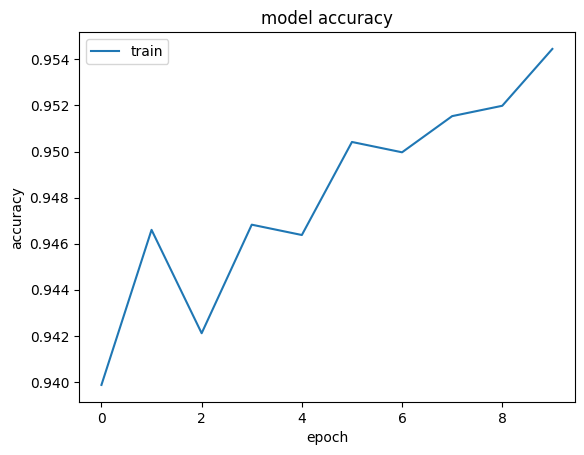

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()